In [1]:
from tensorflow.keras import backend as k

In [2]:
img_width,img_height = 224,224

In [3]:
k.image_data_format() #mention the color at the end

'channels_last'

In [4]:
#rgb channels = 3

In [5]:
input_shape = (img_width,img_height,3) 

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
model = Sequential() #model without neurons
model.add(Conv2D(32,(2,2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))



In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
train_data_folder ='v_data/train'
test_data_folder ='v_data/test'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [13]:
train_datagenerator = train_datagen.flow_from_directory(
    train_data_folder,
    target_size = (224,224),
    batch_size = 16,
    class_mode='binary'
)

Found 400 images belonging to 2 classes.


In [14]:
test_datagenerator = test_datagen.flow_from_directory(
    test_data_folder,
    target_size = (224,224),
    batch_size = 16,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [15]:
model.fit_generator(
    train_datagenerator,
    steps_per_epoch=400 // 16,
    epochs = 3,
    validation_data=test_datagenerator,
    validation_steps=100 // 16
)

Epoch 1/3


C:\Users\thewa\AppData\Local\Temp\ipykernel_12884\3816494323.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


25/25 [==============================] - 14s 517ms/step - loss: 39.2664 - accuracy: 0.5475 - val_loss: 0.4631 - val_accuracy: 0.8125
Epoch 2/3
25/25 [==============================] - 13s 520ms/step - loss: 0.6628 - accuracy: 0.7175 - val_loss: 0.3727 - val_accuracy: 0.8750
Epoch 3/3
25/25 [==============================] - 12s 480ms/step - loss: 0.3844 - accuracy: 0.8200 - val_loss: 0.4420 - val_accuracy: 0.8438


In [16]:
from tensorflow.keras.preprocessing.image import load_img

In [96]:
image = load_img('v_data/train/PLANES/26.jpg',target_size=(224,224))

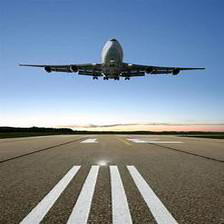

In [97]:
image

In [98]:
import numpy as np


In [99]:
img = np.array(image)

In [100]:
img

array([[[ 78, 118, 177],
        [ 78, 118, 177],
        [ 78, 118, 177],
        ...,
        [ 52,  94, 154],
        [ 52,  94, 154],
        [ 52,  94, 154]],

       [[ 78, 118, 177],
        [ 78, 118, 177],
        [ 78, 118, 177],
        ...,
        [ 53,  95, 155],
        [ 52,  94, 154],
        [ 52,  94, 154]],

       [[ 79, 119, 178],
        [ 79, 119, 178],
        [ 79, 119, 178],
        ...,
        [ 53,  95, 155],
        [ 53,  95, 155],
        [ 52,  94, 154]],

       ...,

       [[ 47,  38,  21],
        [ 59,  50,  33],
        [ 65,  56,  39],
        ...,
        [ 93,  84,  69],
        [ 89,  80,  65],
        [ 84,  75,  60]],

       [[ 60,  51,  34],
        [ 65,  56,  39],
        [ 60,  51,  34],
        ...,
        [ 91,  82,  67],
        [ 83,  74,  59],
        [ 80,  71,  56]],

       [[ 65,  56,  39],
        [ 64,  55,  38],
        [ 51,  42,  25],
        ...,
        [ 57,  48,  33],
        [ 36,  27,  12],
        [ 41,  32,  17]]

In [101]:
img.shape

(224, 224, 3)

In [102]:
img = img.reshape(1,224, 224, 3)

In [103]:
img.shape

(1, 224, 224, 3)

In [104]:
img

array([[[[ 78, 118, 177],
         [ 78, 118, 177],
         [ 78, 118, 177],
         ...,
         [ 52,  94, 154],
         [ 52,  94, 154],
         [ 52,  94, 154]],

        [[ 78, 118, 177],
         [ 78, 118, 177],
         [ 78, 118, 177],
         ...,
         [ 53,  95, 155],
         [ 52,  94, 154],
         [ 52,  94, 154]],

        [[ 79, 119, 178],
         [ 79, 119, 178],
         [ 79, 119, 178],
         ...,
         [ 53,  95, 155],
         [ 53,  95, 155],
         [ 52,  94, 154]],

        ...,

        [[ 47,  38,  21],
         [ 59,  50,  33],
         [ 65,  56,  39],
         ...,
         [ 93,  84,  69],
         [ 89,  80,  65],
         [ 84,  75,  60]],

        [[ 60,  51,  34],
         [ 65,  56,  39],
         [ 60,  51,  34],
         ...,
         [ 91,  82,  67],
         [ 83,  74,  59],
         [ 80,  71,  56]],

        [[ 65,  56,  39],
         [ 64,  55,  38],
         [ 51,  42,  25],
         ...,
         [ 57,  48,  33],
        

In [105]:
label = model.predict(img)

1/1 [==============================] - 0s 36ms/step


In [106]:
label

array([[0.9497546]], dtype=float32)

In [107]:
label[0][0]

0.9497546

In [109]:
if label[0][0] >= 0.5:
    print("PLANE")
    #PRINT(CAR)
else:
    #PRINT(PLANE)
    print("CAR")

PLANE
